In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
# data_dir = r'C:\Users\aayus\flower_photos'

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16051111039_0f0626a241_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2682566502_967e7eaa2a.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg'),
 PosixPath('datasets/flower_photos/roses/537625768_791e973b40.jpg')]

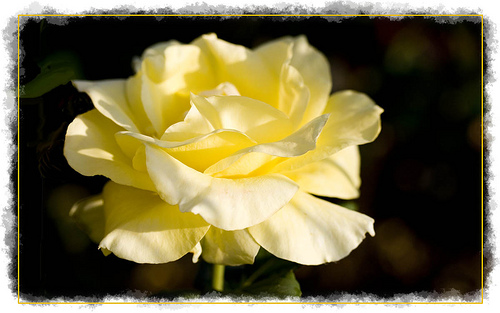

In [9]:
PIL.Image.open(str(roses[1]))

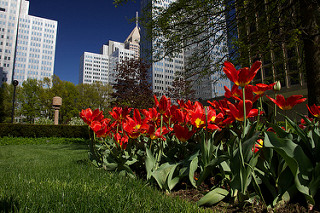

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [12]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/3962240986_0661edc43a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3463313493_9497aa47e5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6884975451_c74f445d69_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/506348009_9ecff8b6ef.jpg'),
 PosixPath('datasets/flower_photos/daisy/422094774_28acc69a8b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5769217520_c90efc3c93_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/512177035_70afc925c8.jpg'),
 PosixPath('datasets/flower_photos/daisy/20685027271_0e7306e7c1_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5714327423_50af0cffe9.jpg'),
 PosixPath('datasets/flower_photos/daisy/8071646795_2fdc89ab7a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/20182559506_40a112f762.jpg'),
 PosixPath('datasets/flower_photos/daisy/4851353993_2cbbbd1040_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8742143296_fed9fa007c.jpg'),
 PosixPath('datasets/flower_photos/daisy/15306268004_4680ba95e1.jpg'),
 Pos

In [13]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 320, 3)

In [16]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [17]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
x[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 1,  1, 19],
        [ 2,  2, 27],
        [ 3,  2, 36],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [ 1,  1,  1]],

       [[ 0,  1, 19],
        [ 2,  1, 27],
        [ 1,  0, 35],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[ 1,  1, 20],
        [ 3,  2, 29],
        [ 2,  0, 36],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)

In [19]:
X = np.array(x)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 13s 20ms/step - loss: 1.4315 - accuracy: 0.4019
Epoch 2/30
86/86 [==============================] - 2s 21ms/step - loss: 1.0193 - accuracy: 0.6007
Epoch 3/30
86/86 [==============================] - 2s 21ms/step - loss: 0.8164 - accuracy: 0.6850
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.6197 - accuracy: 0.7809
Epoch 5/30
86/86 [==============================] - 2s 24ms/step - loss: 0.4445 - accuracy: 0.8452
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.2684 - accuracy: 0.9132
Epoch 7/30
86/86 [==============================] - 2s 19ms/step - loss: 0.1571 - accuracy: 0.9560
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0784 - accuracy: 0.9797
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0335 - accuracy: 0.9935
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0698 - accuracy: 0.9775
Epoch 11

In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 15ms/step - loss: 3.2748 - accuracy: 0.6220


[3.2748372554779053, 0.6220043301582336]

In [24]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 10ms/step


array([[  5.097922  ,  17.287092  ,   5.2607956 ,  -5.4804654 ,
        -13.986417  ],
       [ 19.460047  ,  -4.665296  , -13.913837  , -20.814663  ,
         14.074148  ],
       [ -7.279775  ,  14.973489  ,  13.327412  ,  -5.200556  ,
        -12.167597  ],
       ...,
       [  1.8495084 ,   0.9140783 , -10.260619  ,  12.131549  ,
          4.5783463 ],
       [ 17.162924  ,  -6.320821  , -24.225458  , -11.446052  ,
         26.763304  ],
       [ -0.48202378,  -3.601421  ,   3.42339   ,   8.598857  ,
          7.566862  ]], dtype=float32)

In [25]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.0851709e-06, 9.9998891e-01, 5.9846798e-06, 1.2947049e-10,
       2.6186796e-14], dtype=float32)>

In [26]:
np.argmax(score)

1

In [27]:
y_test[0]

1

In [28]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.3),
])

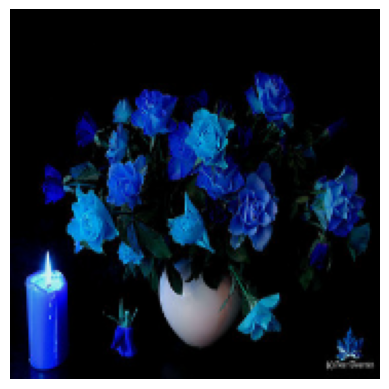

In [29]:
plt.axis('off')
plt.imshow(x[0])

In [30]:
data_augmentation(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        ...,
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ]],

       [[ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        ...,
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ]],

       [[ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        ...,
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ],
        [ 1.1796176,  2.7329063,  5.39621  ]],

       ...,

       [[ 2.0406873,  3.593976 , 21.756533 ],
        [ 2.9

In [34]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180,
                                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

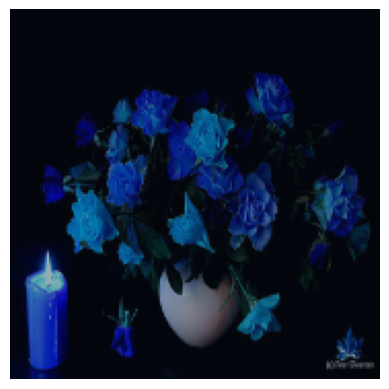

In [32]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [35]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 5s 22ms/step - loss: 1.4884 - accuracy: 0.3430
Epoch 2/30
86/86 [==============================] - 2s 22ms/step - loss: 1.0929 - accuracy: 0.5585
Epoch 3/30
86/86 [==============================] - 2s 22ms/step - loss: 0.9747 - accuracy: 0.6225
Epoch 4/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8994 - accuracy: 0.6533
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8419 - accuracy: 0.6795
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.7929 - accuracy: 0.6915
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.7973 - accuracy: 0.6966
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.7349 - accuracy: 0.7202
Epoch 9/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6935 - accuracy: 0.7366
Epoch 10/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6721 - accuracy: 0.7424
Epoch 11/

In [36]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 15ms/step - loss: 0.9839 - accuracy: 0.7233


[0.9838698506355286, 0.7233115434646606]